# TextBlob


### Run the code blocks below to generate only the TextBlob experiments.

In [1]:
from textblob import TextBlob
import json
import pandas as pd
from markdown import markdown
from bs4 import BeautifulSoup
import numpy as np
import pygsheets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Access the sheets and get the commit sheet (uncomment)
# Change the service_file with your own or use the local version of the CSV.
# gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
# sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
# commit_sheet = sheets[0]

# get a dictionary of the tables
# data_dic = commit_sheet.get_all_records()

# pandas_df = pd.DataFrame(data=data_dic)

In [ ]:
# Alternatively, load the data from a local CSV file.

pandas_df = pd.read_csv("Issue Analysis.csv")

In [ ]:
new_df = pandas_df[pandas_df["label"].str.contains("cost-")]
new_df  # Pandas dataframe with cost-related entries

In [3]:
# Drop the column that are not needed.
new_df.drop(labels=["Check status", "Summary"], inplace=True, axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [4]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral
...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\n\nJenkins VPC already ava...,cost-awareness-unknown,


In [5]:
# Clean code of Markdown and HTML code.
for index, row in new_df.iterrows():
    row["Commit Description"] = markdown(row["Commit Description"])
    row["Commit Description"] = ''.join(BeautifulSoup(row["Commit Description"]).findAll(text=True))

In [6]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral
...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,


In [7]:
new_df["Predicted SE"] = ""
new_df

<ipython-input-7-7167aff69120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Predicted SE"] = ""


,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,
...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,,


In [8]:
for index, row in new_df.iterrows():
    polarity = TextBlob(row["Commit Description"]).sentiment.polarity

    # I use the indicated values on the documentation of TextBlob.
    if polarity < 0:
        sentiment =  "Negative"
    elif polarity == 0:
        sentiment = "Neutral"
    else:
        sentiment = "Positive"

    row["Predicted SE"] = sentiment

In [9]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,Neutral
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,Positive
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,Neutral
...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,Neutral
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,Neutral
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,Neutral
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,,Positive


In [12]:
# Sanity check for predicted sentiments.
new_df[new_df["Sentiment"] != ""]

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,Neutral
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,Positive
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,Neutral
...,...,...,...,...,...,...,...,...
391,https://github.com/00inboxtest/cloud-foundatio...,Terraform Examples and Modules for Google Cloud,bill,https://github.com/00inboxtest/cloud-foundatio...,Billing budget module,cost-awareness-alert,Neutral,Neutral
393,https://github.com/laurijssen/tform_azure.git,Setup remote state keyvault,cheap,https://github.com/laurijssen/tform_azure/comm...,northeurope center mo cheapo,cost-saving-area,Positive,Negative
399,https://github.com/plxis/eng-ci.git,This repository contains example Terraform con...,expense,https://github.com/plxis/eng-ci/commit/b795561...,Add toxic host into standard eng-ci; removed i...,cost-saving-feature,Positive,Neutral
410,https://github.com/alphagov/govuk-terraform-pr...,This repository contains the configuration to ...,cost,https://github.com/alphagov/govuk-terraform-pr...,sets up S3 bucket for transition logs\nWe want...,cost-saving-storage,Positive,Negative


In [13]:
# Needed for creating the confusion matrix.
expected = []
predicted = []
for index, row in new_df.iterrows():
    if row["Sentiment"]:
        expected.append(row["Sentiment"])
        predicted.append(row["Predicted SE"])

In [14]:
results = confusion_matrix(expected, predicted)
print(results)

[[ 8  2  2]
 [ 1 22  7]
 [ 8 30 21]]


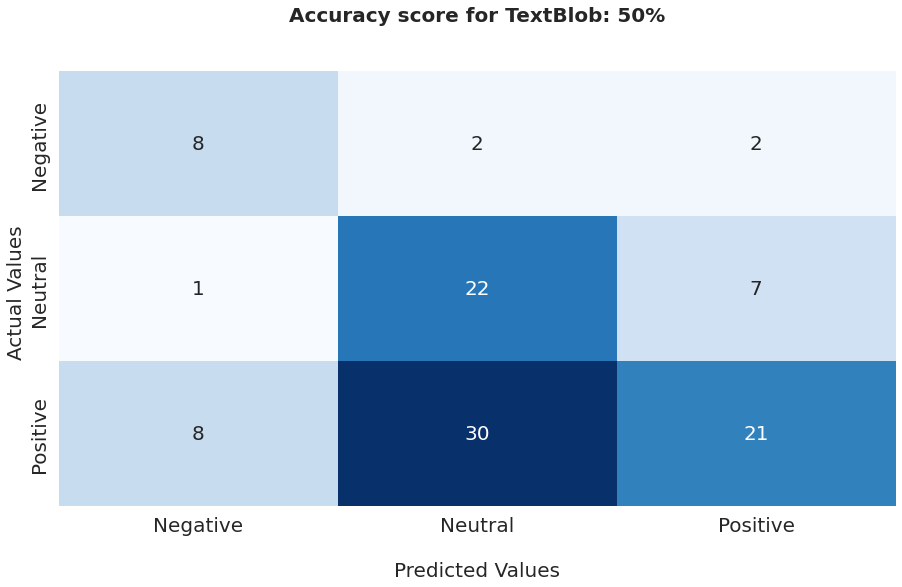

In [15]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.heatmap(results, annot=True, cmap='Blues', cbar = False, annot_kws={"size": 20})

ax.set_title(f'Accuracy score for TextBlob: {int(accuracy_score(expected, predicted) * 100)}%\n\n', fontsize=20, weight='bold')
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize = 20)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
figure = ax.get_figure()

figure.savefig('TextBlob-matrix.png', bbox_inches='tight')

# Vader

### Run the code blocks below to generate only the Vader experiments.

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import pandas as pd
from markdown import markdown
from bs4 import BeautifulSoup
import numpy as np
import pygsheets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
# access the sheets and get the commit sheet

# change the service_file with your own or use the local version of the CSV.
gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
commit_sheet = sheets[0]

# get a dictionary of the tables
data_dic = commit_sheet.get_all_records()

pandas_df = pd.DataFrame(data=data_dic)
new_df = pandas_df[pandas_df["Labels"].str.contains("cost-")]

In [18]:
new_df.drop(labels=["Check status", "Summary"], inplace=True, axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral
...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\n\nJenkins VPC already ava...,cost-awareness-unknown,


In [20]:
# Clean code of Markdown and HTML code.
for index, row in new_df.iterrows():
    row["Commit Description"] = markdown(row["Commit Description"])
    row["Commit Description"] = ''.join(BeautifulSoup(row["Commit Description"]).findAll(text=True))

In [21]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral
...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,


In [22]:
new_df["Predicted SE"] = ""
new_df

<ipython-input-22-7167aff69120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Predicted SE"] = ""


,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,
...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,,


In [23]:
analyzer = SentimentIntensityAnalyzer()
for index, row in new_df.iterrows():
    sentiment_dict = analyzer.polarity_scores(row["Commit Description"])

    # These thresholds can be changed, but I went on with the ones recommended on the Vader docs.
    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"

    row["Predicted SE"] = overall_sentiment

In [24]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,Neutral
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,Neutral
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,Neutral
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,Positive
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,Neutral
...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,Neutral
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,Positive
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,Positive
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,,Neutral


In [27]:
new_df[new_df["Sentiment"] != ""]

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,Neutral
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,Neutral
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,Neutral
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,Positive
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,Neutral
...,...,...,...,...,...,...,...,...
391,https://github.com/00inboxtest/cloud-foundatio...,Terraform Examples and Modules for Google Cloud,bill,https://github.com/00inboxtest/cloud-foundatio...,Billing budget module,cost-awareness-alert,Neutral,Neutral
393,https://github.com/laurijssen/tform_azure.git,Setup remote state keyvault,cheap,https://github.com/laurijssen/tform_azure/comm...,northeurope center mo cheapo,cost-saving-area,Positive,Neutral
399,https://github.com/plxis/eng-ci.git,This repository contains example Terraform con...,expense,https://github.com/plxis/eng-ci/commit/b795561...,Add toxic host into standard eng-ci; removed i...,cost-saving-feature,Positive,Neutral
410,https://github.com/alphagov/govuk-terraform-pr...,This repository contains the configuration to ...,cost,https://github.com/alphagov/govuk-terraform-pr...,sets up S3 bucket for transition logs\nWe want...,cost-saving-storage,Positive,Negative


In [28]:
expected = []
predicted = []
for index, row in new_df.iterrows():
    if row["Sentiment"]:
        expected.append(row["Sentiment"])
        predicted.append(row["Predicted SE"])

In [29]:
results = confusion_matrix(expected, predicted)
print(results)

[[ 3  8  1]
 [ 6 18  6]
 [10 31 18]]


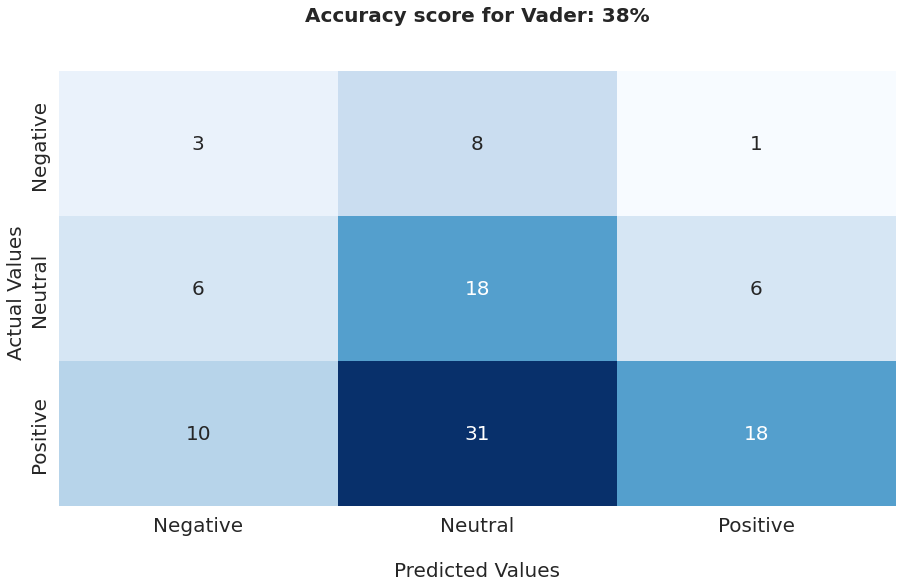

In [30]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.heatmap(results, annot=True, cmap='Blues', cbar = False, annot_kws={"size": 20})

ax.set_title(f'Accuracy score for Vader: {int(accuracy_score(expected, predicted) * 100)}%\n\n', fontsize=20, weight='bold')
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize = 20)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
figure = ax.get_figure()

figure.savefig('Vader-matrix.png', bbox_inches='tight')

# Stanza

### Run the code blocks below to compile online the Stanza experiments.

In [31]:
import stanza
from stanza.models.common.doc import Document
import pandas as pd
from markdown import markdown
from bs4 import BeautifulSoup
import pygsheets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [32]:
# access the sheets and get the commit sheet

# change the service_file with your own or use the local version of the CSV.
gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
commit_sheet = sheets[0]

# get a dictionary of the tables
data_dic = commit_sheet.get_all_records()

pandas_df = pd.DataFrame(data=data_dic)
new_df = pandas_df[pandas_df["Labels"].str.contains("cost-")]

In [33]:
new_df.drop(labels=["Check status", "Summary"], inplace=True, axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral
...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\n\nJenkins VPC already ava...,cost-awareness-unknown,


In [35]:
# Clean code of Markdown and HTML code.
for index, row in new_df.iterrows():
    row["Commit Description"] = markdown(row["Commit Description"])
    row["Commit Description"] = ''.join(BeautifulSoup(row["Commit Description"]).findAll(text=True))

In [36]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral
...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,


In [37]:
new_df["Predicted SE"] = ""
new_df

<ipython-input-37-7167aff69120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Predicted SE"] = ""


,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,
...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,,


In [38]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

for index, row in new_df.iterrows():

    doc = nlp(row["Commit Description"])
    sentiment = 0
    size = len(doc.sentences)
    # Same concept as in the Issues notebook. We average out the sentiment over all sentences in a document.
    for i, sentence in enumerate(doc.sentences):
        sentiment += sentence.sentiment

    sentiment = sentiment / size

    sentiment = round(sentiment, 0)

    if sentiment == 0:
        sa = "Negative"
    elif sentiment == 1:
        sa = "Neutral"
    else:
        sa = "Positive"

    row["Predicted SE"] = sa

2022-07-06 20:35:37 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-07-06 20:35:37 INFO: Use device: cpu
2022-07-06 20:35:37 INFO: Loading: tokenize
2022-07-06 20:35:38 INFO: Loading: sentiment
2022-07-06 20:35:38 INFO: Done loading processors!


In [39]:
new_df

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,Neutral
...,...,...,...,...,...,...,...,...
2392,https://github.com/singaporewaketools/iaac.git,Terraform based infrastructure,bill,https://github.com/singaporewaketools/iaac/com...,Add billing alerts,cost-awareness-alert,,Neutral
2393,https://github.com/singaporewaketools/iaac.git,,bill,https://github.com/singaporewaketools/iaac/com...,Fix billing alert subscriptions,cost-awareness-alert,,Negative
2394,https://github.com/sbogacz/terraform-aws-state...,This is a simple terraform module to bootstrap...,bill,https://github.com/sbogacz/terraform-aws-state...,use DynamoDB On Demand billing for the lock ta...,cost-saving-storage,,Negative
2395,https://github.com/nationalarchives/tdr-grafan...,Repository containing the configuration necess...,cost,https://github.com/nationalarchives/tdr-grafan...,Move to Jenkins VPC\nJenkins VPC already avail...,cost-awareness-unknown,,Negative


In [42]:
new_df[new_df["Sentiment"] != ""]

,Repository,Repo Description,Keyword,Commit Link,Commit Description,Labels,Sentiment,Predicted SE
0,https://github.com/tkhoa2711/terraform-digital...,Playground to test Terraform with DigitalOcean...,cheap,https://github.com/tkhoa2711/terraform-digital...,provision a droplet with cheapest price,cost-saving-unknown,Positive,Positive
4,https://github.com/blinkist/terraform-aws-airs...,This is a partner project to the AWS ECS Servi...,cost,https://github.com/blinkist/terraform-aws-airs...,Removed the default use of detailed monitoring...,cost-saving-unknown,Positive,Positive
7,https://github.com/stealthHat/k8s-terraform.git,small infrascode for my AWS cluster using terr...,expense,https://github.com/stealthHat/k8s-terraform/co...,nat gateway is verry expensive,cost-awareness-networking-NAT,Negative,Negative
8,https://github.com/stealthHat/k8s-terraform.git,,cost,https://github.com/stealthHat/k8s-terraform/co...,move to us for better prices - I manually add...,cost-saving-area,Neutral,Neutral
10,https://github.com/JamesWoolfenden/terraform-a...,Terraform module to provision a container pipe...,cost,https://github.com/JamesWoolfenden/terraform-a...,costs,cost-awareness-storage,Neutral,Neutral
...,...,...,...,...,...,...,...,...
391,https://github.com/00inboxtest/cloud-foundatio...,Terraform Examples and Modules for Google Cloud,bill,https://github.com/00inboxtest/cloud-foundatio...,Billing budget module,cost-awareness-alert,Neutral,Neutral
393,https://github.com/laurijssen/tform_azure.git,Setup remote state keyvault,cheap,https://github.com/laurijssen/tform_azure/comm...,northeurope center mo cheapo,cost-saving-area,Positive,Neutral
399,https://github.com/plxis/eng-ci.git,This repository contains example Terraform con...,expense,https://github.com/plxis/eng-ci/commit/b795561...,Add toxic host into standard eng-ci; removed i...,cost-saving-feature,Positive,Negative
410,https://github.com/alphagov/govuk-terraform-pr...,This repository contains the configuration to ...,cost,https://github.com/alphagov/govuk-terraform-pr...,sets up S3 bucket for transition logs\nWe want...,cost-saving-storage,Positive,Negative


In [43]:
expected = []
predicted = []
for index, row in new_df.iterrows():
    if row["Sentiment"]:
        expected.append(row["Sentiment"])
        predicted.append(row["Predicted SE"])

In [44]:
results = confusion_matrix(expected, predicted)
print(results)

[[10  2  0]
 [10 19  1]
 [26 29  4]]


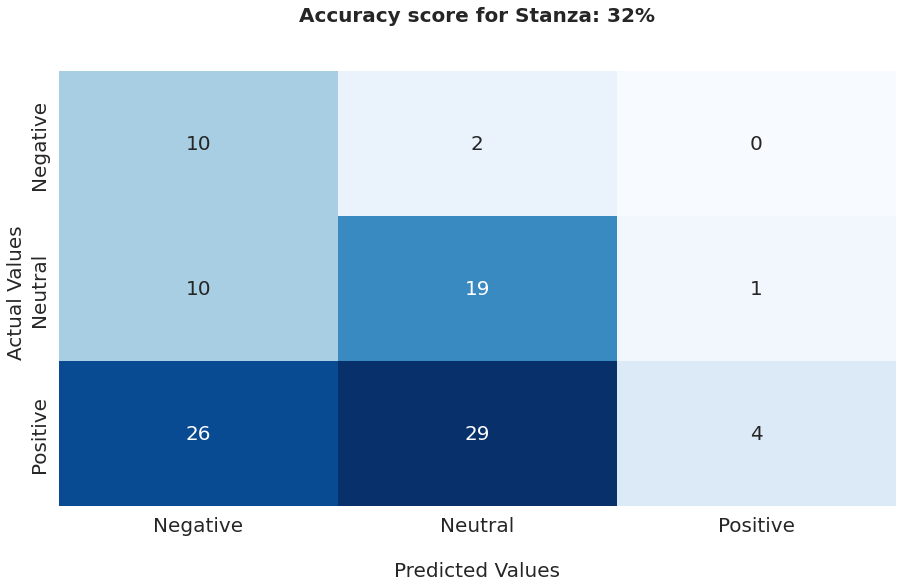

In [45]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.heatmap(results, annot=True, cmap='Blues', cbar = False, annot_kws={"size": 20})

ax.set_title(f'Accuracy score for Stanza: {int(accuracy_score(expected, predicted) * 100)}%\n\n', fontsize=20, weight='bold')
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize = 20)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
figure = ax.get_figure()

figure.savefig('Stanza-matrix.png', bbox_inches='tight')

### Some comments that contain insights extracted by looking at the sentiment predictions.

In [10]:
# Cheap (cheaper) seems to give mostly true-positive sentiment
# Reduces "something" (mostly cost) also gives true-positive sentiment
# Remove and expensive together seems to give positive sentiment sometimes.
# Fixed + cost or something related to this gives positive-sentiment.
# The word start also seems to give positive vibes although they are mostly false-positives
# cost-effective, efficient, performance also give good vibes

# There are quite a bit of false positives too, mostly that should be neutral

,text,sentiment,confidence
4,Removed the default use of detailed monitoring...,Positive,0.4
17,Set resource requests/limits for statsd sideca...,Positive,0.275
20,a more cheaper instance,Positive,0.5
25,Bump Kubernetes/Tectonic versions (#79)\n\n\nt...,Positive,0.016667
26,.: Add 'make payload'\nModify the 'make-update...,Positive,0.25
...,...,...,...
2417,Use global HTTP/TCP proxy load balancing for I...,Positive,0.041667
2418,Change AWS default type from t2.small to t3.sm...,Positive,0.025
2419,Add Google Cloud worker instances to a target ...,Positive,0.09375
2420,Change DO worker_type default from s-1vcpu-1gb...,Positive,0.125


In [11]:
# Everything that contains expensive (accompanied by very or inherently or so on) is tagged as negative. Commits with expensive
# tag also have high negative confidence scores (around -0.5)
# Sentences that contain not efficient or fail also get tagged correctly as negative.
# Sometime less expensive gets tagged as negative
# Remove "something" due to "something" also seems to be tagged as negative and could work.
# Remove with expensive in the same sentence seems to give good negative vibes.


,text,sentiment,confidence
3,Minecraft (#18)\nMinecraft recipe\nFeatures\nR...,Negative,-0.185185
7,nat gateway is verry expensive,Negative,-0.5
18,Add prod var\nWhat if we want to use less (or ...,Negative,-0.166667
29,"update-payload: Fix ""make payload"".\nNeed to d...",Negative,-0.25
34,Fix undefined variables in upload-payload/asse...,Negative,-0.4
...,...,...,...
2369,Optional NAT\nThis feature allows users to dis...,Negative,-0.183333
2370,feat: alarms for metric traffic problems (#80)...,Negative,-0.175
2371,feat: increase API gateway 5xx alarm threshold...,Negative,-0.181818
2379,Minecraft (#18)\nMinecraft recipe\nFeatures\nR...,Negative,-0.185185


In [12]:
# Some issues are that sometimes sentences with cheapest are tagged as neutral and they should be positive.
# Tags some cost-reductions sentences as neutral.
# Misses some texts talking about fixes, but they could be interpreted as neutral.
# Most of these are set as neutral because there is no context behind them.
# Most of the false-positives seems to should have been tagged as positive, but they are slightly positive so that's why 
# they fail.

,text,sentiment,confidence
0,provision a droplet with cheapest price,Neutral,0.0
1,Added billing API & changed folder-display name,Neutral,0.0
2,Added billingAccountUser @ Org level to SA,Neutral,0.0
5,"Initial terraform files, and dockerfile to add...",Neutral,0.0
6,payroll app module,Neutral,0.0
...,...,...,...
2410,Add module subscription_billing_role_assignments,Neutral,0.0
2411,Update billing role assignment,Neutral,0.0
2412,Add variable subscription_billing_role_assignm...,Neutral,0.0
2413,Update billing role assignment,Neutral,0.0
